# 7. 규제된 선형 회귀

In [ ]:
# 릿지 회귀 : L2 규제 적용

In [23]:
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as mt

diab = d.load_diabetes()
X_train, X_test, y_train, y_test = ms.train_test_split(diab.data, diab.target, 
                                                       test_size = 0.3,
                                                       random_state = 78)


# 일반 회귀 수행
# 회귀 객체 생성
lr = lm.LinearRegression()
reg = lr.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = mt.r2_score(y_test, y_pred)

# 결정 계수 출력
print("결정계수 :",r2)

# 독립 변수 별로 회귀 계수를 Series로 만들어 출력
import pandas as pd
import numpy as np

cf = pd.Series(data = np.round(reg.coef_, 3), index = diab.feature_names)
print(cf)

결정계수 : 0.5015153587510888
age     -40.651
sex    -188.834
bmi     446.194
bp      376.689
s1    -1088.036
s2      762.812
s3      181.588
s4       35.486
s5     1003.980
s6       52.820
dtype: float64


In [19]:
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as mt

diab = d.load_diabetes()
X_train, X_test, y_train, y_test = ms.train_test_split(diab.data, diab.target, 
                                                       test_size = 0.3,
                                                       random_state = 78)


# 릿지 회귀 수행. alpha 값은 0.01로 지정!
# 릿지 회귀 객체 생성
ridge = lm.Ridge(alpha = 0.01)
reg = ridge.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = mt.r2_score(y_test, y_pred)

# 결정 계수 출력
print("결정계수 :",r2)

# 독립 변수 별로 회귀 계수를 Series로 만들어 출력
import pandas as pd
import numpy as np

cf = pd.Series(data = np.round(reg.coef_, 3), index = diab.feature_names)
print(cf)

결정계수 : 0.5126648996637301
age    -29.339
sex   -179.510
bmi    450.733
bp     367.440
s1    -436.699
s2     239.094
s3     -95.215
s4     -23.619
s5     735.286
s6      60.548
dtype: float64


Text(0.5,1,'Comparison')

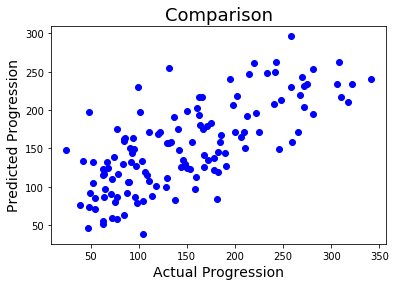

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# 산점도
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel("Actual Progression", fontsize = 14)
plt.ylabel("Predicted Progression", fontsize = 14)
plt.title("Comparison", fontsize = 18)

In [25]:
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import pandas as pd
import numpy as np

diab = d.load_diabetes()
X = diab.data
y = diab.target
df = pd.DataFrame()

# 여러 alpha 값들로 릿지 회귀 수행
# 훈련 및 검증 데이터를 분리하지 않고 원본 데이터 전체를 학습에 사용
alphas = [0, 0.01, 1, 10, 100]

for a in alphas :
    ridge = lm.Ridge(alpha = a)
    reg = ridge.fit(X, y)
    
    # 회귀계수와 절편을 수평방향으로 붙임
    # np.hstack([])
    cf = pd.Series(data = np.hstack([reg.coef_, reg.intercept_]),
                   index = [s.upper() for s in diab.feature_names] + ["INTERCEPT"])
    colname = "alpha = " + str(a)
    df[colname] = cf
    
display(df)

,alpha = 0,alpha = 0.01,alpha = 1,alpha = 10,alpha = 100
AGE,-10.012198,-7.199457,29.465746,19.812822,2.897090
SEX,-239.819089,-234.552930,-83.154885,-0.918458,0.585254
BMI,519.839787,520.583136,306.351627,75.416167,9.240719
BP,324.390428,320.523356,201.629434,55.025419,6.931321
S1,-792.184162,-380.607066,5.909369,19.924600,3.230957
S2,476.745838,150.483752,-29.515927,13.948686,2.616766
S3,101.044570,-78.591232,-152.040465,-47.553816,-6.174550
S4,177.064176,130.313059,117.311715,48.259420,6.678027
S5,751.279321,592.349587,262.944995,70.144068,8.876864
S6,67.625386,71.133768,111.878718,44.213876,5.955597


In [ ]:
# 라쏘 회귀 : L1 규제 적용

In [33]:
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as mt

diab = d.load_diabetes()
X_train, X_test, y_train, y_test = ms.train_test_split(diab.data, diab.target, 
                                                       test_size = 0.3,
                                                       random_state = 78)


# 라쏘 회귀 수행. alpha 값은 0.01로 지정!
# 라쏘 회귀 객체 생성
lasso = lm.Lasso(alpha = 0.01)
reg = lasso.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = mt.r2_score(y_test, y_pred)

# 결정 계수 출력
print("결정계수 :",r2)

# 독립 변수 별로 회귀 계수를 Series로 만들어 출력
import pandas as pd
import numpy as np

cf = pd.Series(data = np.round(reg.coef_, 3), index = diab.feature_names)
print(cf)

결정계수 : 0.5088520367941951
age    -27.913
sex   -177.585
bmi    451.930
bp     367.985
s1    -643.630
s2     400.500
s3      -0.000
s4       0.000
s5     825.933
s6      50.191
dtype: float64


Text(0.5,1,'Comparison')

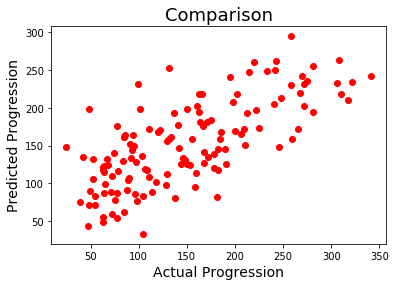

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

# 산점도
plt.scatter(y_test, y_pred, color = 'red')
plt.xlabel("Actual Progression", fontsize = 14)
plt.ylabel("Predicted Progression", fontsize = 14)
plt.title("Comparison", fontsize = 18)

In [31]:
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import pandas as pd
import numpy as np

diab = d.load_diabetes()
X = diab.data
y = diab.target
df = pd.DataFrame()

# 여러 alpha 값들로 라쏘 회귀 수행
# 훈련 및 검증 데이터를 분리하지 않고 원본 데이터 전체를 학습에 사용
alphas = [0, 0.01, 1, 10, 100]

for a in alphas :
    lasso = lm.Lasso(alpha = a)
    reg = lasso.fit(X, y)
    
    # 회귀계수와 절편을 수평방향으로 붙임
    # np.hstack([])
    cf = pd.Series(data = np.hstack([reg.coef_, reg.intercept_]),
                   index = [s.upper() for s in diab.feature_names] + ["INTERCEPT"])
    colname = "alpha = " + str(a)
    df[colname] = cf
    
display(df)

C:\ProgramData\ANACONDA\lib\site-packages\ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\ProgramData\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,alpha = 0,alpha = 0.01,alpha = 1,alpha = 10,alpha = 100
AGE,-10.012198,-1.306575,0.000000,0.000000,0.000000
SEX,-239.819089,-228.822331,-0.000000,0.000000,0.000000
BMI,519.839787,525.560658,367.701852,0.000000,0.000000
BP,324.390428,316.175320,6.301904,0.000000,0.000000
S1,-792.184135,-307.013677,0.000000,0.000000,0.000000
S2,476.745817,89.321688,0.000000,0.000000,0.000000
S3,101.044558,-105.081398,-0.000000,-0.000000,-0.000000
S4,177.064173,119.597989,0.000000,0.000000,0.000000
S5,751.279311,571.330871,307.605700,0.000000,0.000000
S6,67.625386,65.007316,0.000000,0.000000,0.000000


In [ ]:
mport sklearn.model_selection as ms
impor

In [ ]:
# 엘라스틱넷 회귀 : L1 규제와 L2 규제를 혼합!

In [37]:
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as mt

diab = d.load_diabetes()
X_train, X_test, y_train, y_test = ms.train_test_split(diab.data, diab.target, 
                                                       test_size = 0.3,
                                                       random_state = 78)


# 엘라스틱넷 회귀 수행. alpha 값은 0.01, r 값은 0.5로 지정!
# 엘라스틱넷 회귀 객체 생성
elastic = lm.ElasticNet(alpha = 0.01, l1_ratio = 0.5)
reg = elastic.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = mt.r2_score(y_test, y_pred)

# 결정 계수 출력
print("결정계수 :",r2)

# 독립 변수 별로 회귀 계수를 Series로 만들어 출력
import pandas as pd
import numpy as np

cf = pd.Series(data = np.round(reg.coef_, 3), index = diab.feature_names)
print(cf)

결정계수 : 0.3829462987474108
age     41.467
sex    -15.595
bmi    188.291
bp     166.146
s1      17.336
s2      -6.645
s3    -113.204
s4      88.288
s5     193.035
s6      97.612
dtype: float64


Text(0.5,1,'Comparison')

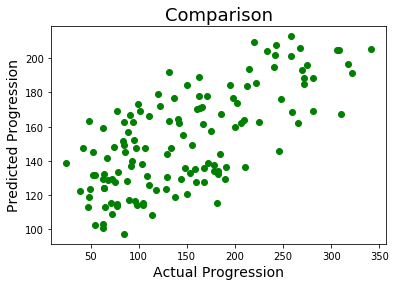

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

# 산점도
plt.scatter(y_test, y_pred, color = 'green')
plt.xlabel("Actual Progression", fontsize = 14)
plt.ylabel("Predicted Progression", fontsize = 14)
plt.title("Comparison", fontsize = 18)

In [39]:
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import pandas as pd
import numpy as np

diab = d.load_diabetes()
X = diab.data
y = diab.target
df = pd.DataFrame()

# r 값은 0.5로 고정하고, 여러 alpha 값들로 엘라스틱넷 회귀 수행
# 훈련 및 검증 데이터를 분리하지 않고 원본 데이터 전체를 학습에 사용
alphas = [0, 0.01, 1, 10, 100]

for a in alphas :
    elastic = lm.ElasticNet(alpha = a, l1_ratio = 0.5)
    reg = elastic.fit(X, y)
    
    # 회귀계수와 절편을 수평방향으로 붙임
    # np.hstack([])
    cf = pd.Series(data = np.hstack([reg.coef_, reg.intercept_]),
                   index = [s.upper() for s in diab.feature_names] + ["INTERCEPT"])
    colname = "alpha = " + str(a)
    df[colname] = cf
    
display(df)

C:\ProgramData\ANACONDA\lib\site-packages\ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\ProgramData\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,alpha = 0,alpha = 0.01,alpha = 1,alpha = 10,alpha = 100
AGE,-10.012198,33.147202,0.359018,0.000000,0.000000
SEX,-239.819089,-35.245609,0.000000,0.000000,0.000000
BMI,519.839787,211.023930,3.259767,0.000000,0.000000
BP,324.390428,144.560115,2.204356,0.000000,0.000000
S1,-792.184135,21.931533,0.528646,0.000000,0.000000
S2,476.745817,0.000000,0.250935,0.000000,0.000000
S3,101.044558,-115.620017,-1.861363,-0.000000,-0.000000
S4,177.064173,100.658838,2.114454,0.000000,0.000000
S5,751.279311,185.326334,3.105841,0.000000,0.000000
S6,67.625386,96.257214,1.769851,0.000000,0.000000


In [40]:
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import pandas as pd
import numpy as np

diab = d.load_diabetes()
X = diab.data
y = diab.target
df = pd.DataFrame()

# alpha 값은 0.01로 고정하고, 여러 r 값들로 엘라스틱넷 회귀 수행
# 훈련 및 검증 데이터를 분리하지 않고 원본 데이터 전체를 학습에 사용
l1_ratio = [0.01, 0.1, 0.5, 0.75, 1]

for r in l1_ratio :
    elastic = lm.ElasticNet(alpha = 0.01, l1_ratio = r)
    reg = elastic.fit(X, y)
    
    # 회귀계수와 절편을 수평방향으로 붙임
    # np.hstack([])
    cf = pd.Series(data = np.hstack([reg.coef_, reg.intercept_]),
                   index = [s.upper() for s in diab.feature_names] + ["INTERCEPT"])
    colname = "l1_ratio = " + str(r)
    df[colname] = cf
    
display(df)

,l1_ratio = 0.01,l1_ratio = 0.1,l1_ratio = 0.5,l1_ratio = 0.75,l1_ratio = 1
AGE,29.664286,30.502682,33.147202,29.228680,-1.306575
SEX,-12.201647,-14.495972,-35.245609,-74.199262,-228.822331
BMI,139.301981,148.364700,211.023930,293.577325,525.560658
BP,98.762731,104.728595,144.560115,193.700364,316.175320
S1,25.795506,25.843804,21.931533,6.387102,-307.013677
S2,13.027108,11.984279,0.000000,-21.860869,89.321688
S3,-82.521697,-87.044388,-115.620017,-146.541969,-105.081398
S4,78.111935,81.552522,100.658838,114.735471,119.597989
S5,125.786550,133.448258,185.326334,252.764800,571.330871
S6,73.338215,76.793979,96.257214,110.043179,65.007316


# 8. 로지스틱회귀

In [45]:
import sklearn.datasets as d

# iris 데이터 호출
# iris 데이터는 Setosa, Versicolour, Virginica와 같이 3개의 클래스로 구성됨.
iris = d.load_iris()

In [46]:
print("특성 :", iris.feature_names)
print("클래스 :", iris.target_names)

특성 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
클래스 : ['setosa' 'versicolor' 'virginica']


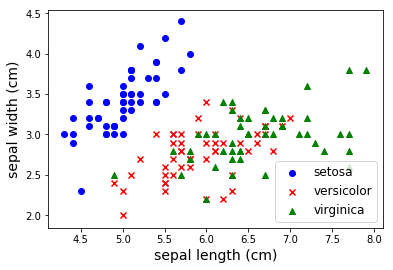

In [52]:
import matplotlib.pyplot as plt

c_set = ["blue", "red", "green"]
m_set = ["o", "x", "^"]
l_set = iris.target_names

X = iris.data
y = iris.target

for t in set(y) :
    X_pts = [X[i, 0] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i, 1] for i in range(len(y)) if y[i] == t]
    plt.scatter(X_pts, y_pts, color = c_set[t], marker = m_set[t], label = l_set[t])

plt.xlabel(iris.feature_names[0], fontsize = 14)
plt.ylabel(iris.feature_names[1], fontsize = 14)

# 범례
# loc = 'best' : 위치를 최적의 위치로 자동으로 지정
plt.legend(loc = 'best', fontsize = 12)

In [55]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [56]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])